In [6]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv(r'C:\Users\Preetham Madhamsetty\Desktop\Shalini\IS733\HW2\red_wine.csv')

df.shape

(571, 4)

In [5]:
df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [8]:
profile = ProfileReport(df, title="Red Wine Dataset Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("red_wine_profile_report.html")


C:\Users\Preetham Madhamsetty\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
import numpy as np

# Check if there are any null values in the dataset
print(df.isnull().sum())

# Split features and labels
X = df.drop("type", axis=1)  # Assuming 'quality' is the target column
y = df["type"].apply(lambda x: 1 if x == 'high' else 0)  # Convert to binary classification (high vs. low)


citric acid    0
sulphates      0
alcohol        0
type           0
dtype: int64


In [11]:
# Baseline Accuracy: Predict the majority class
majority_class = y.mode()[0]
baseline_accuracy = (y == majority_class).mean()
baseline_auc = 0.5  # A random classifier has an AUC of 0.5

print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Model AUC: {baseline_auc:.4f}")


Baseline Model Accuracy: 0.5289
Baseline Model AUC: 0.5000


In [12]:
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=10)
    accuracy = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    auc = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(roc_auc_score)).mean()
    return accuracy, auc


In [13]:
# Initialize models with default parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel="linear", probability=True),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store results
results = {"Model": [], "Accuracy": [], "AUC": []}

# Evaluate each model
for model_name, model in models.items():
    accuracy, auc = evaluate_model(model, X, y)
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["AUC"].append(auc)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")


Logistic Regression - Accuracy: 0.7848, AUC: 0.7819
Naive Bayes - Accuracy: 0.8216, AUC: 0.8185
Decision Tree - Accuracy: 0.7462, AUC: 0.7438
SVM-Linear - Accuracy: 0.7936, AUC: 0.7929
SVM-RBF - Accuracy: 0.5358, AUC: 0.5074
Random Forest - Accuracy: 0.7918, AUC: 0.7859


In [16]:
# Converting results to DataFrame for easier display
results_df = pd.DataFrame(results)

baseline_df = pd.DataFrame([{"Model": "Baseline", "Accuracy": baseline_accuracy, "AUC": baseline_auc}])
results_df = pd.concat([results_df, baseline_df], ignore_index=True)

print(results_df)


                 Model  Accuracy       AUC
0  Logistic Regression  0.784785  0.781938
1          Naive Bayes  0.821627  0.818532
2        Decision Tree  0.746219  0.743816
3           SVM-Linear  0.793587  0.792940
4              SVM-RBF  0.535844  0.507407
5        Random Forest  0.791833  0.785937
6             Baseline  0.528897  0.500000


In [19]:
%matplotlib inline

<Figure size 640x480 with 0 Axes>

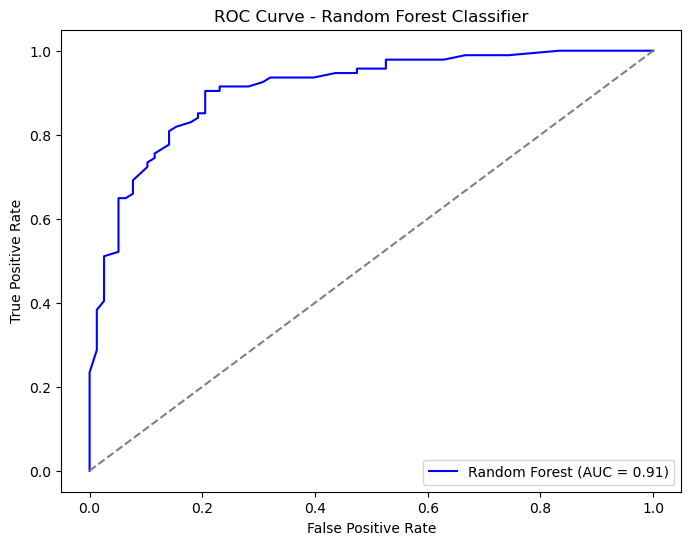

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split features and labels
X = df.drop("type", axis=1)  # Assuming 'quality' is the target column
y = df["type"].apply(lambda x: 1 if x == 'high' else 0)  # Convert to binary classification (high vs. low)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Clear any previous plots to avoid duplicates
plt.clf()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Load the white wine dataset
df_white_wine = pd.read_csv(r'C:\Users\Preetham Madhamsetty\Desktop\Shalini\IS733\HW2\white_wine.csv')

# Split features and labels
X_white = df_white_wine.drop("type", axis=1)  # Assuming 'quality' is the target column
y_white = df_white_wine["type"].apply(lambda x: 1 if x == 'high' else 0)  # Convert to binary classification

# Initialize and train the Naive Bayes model (if needed, or you can use the previously trained model if not retraining)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # You can skip this if using the already trained model from Q2

# Predict probabilities on the white wine data
y_pred_proba_white = nb_model.predict_proba(X_white)[:, 1]

# Compute ROC curve and AUC for white wine data
fpr_white, tpr_white, thresholds_white = roc_curve(y_white, y_pred_proba_white)
roc_auc_white = auc(fpr_white, tpr_white)

print(f"AUC score for the white-wine dataset using the best model (Naive Bayes): {roc_auc_white:.2f}")


AUC score for the white-wine dataset using the best model (Naive Bayes): 0.95
